# Test for OBA

In [1]:
from utils import augmentation, individual_object_functions, save_pred
from utils.augmentation import augment
from utils.visualization import get_unique_classes
from utils.loading import load_labels, load_masked_images, load_images
from utils.visualization import plot_image
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
# labels = load_labels()
# classes = set()
# for label in labels:
#     classes.update(get_unique_classes(labels[label]))
# print("Number of unique classes:", classes)
# print(labels['train_1.tif'])

In [3]:
# print(labels['train_1.tif'])

In [4]:
# masked_images = load_masked_images(subset=True)
# images = load_images(subset=True)

In [5]:
# filenames = set()
# for masked_image in masked_images:
#     if masked_image in images:
#         filenames.add(masked_image)
# print("Filenames:", filenames)
# print("Number of filenames:", len(filenames))

In [6]:
# processed_masked_images = copy.deepcopy(masked_images)
# ### Preprocess the masks to match channels of the images
# print(images["train_0.tif"]["image"].shape, masked_images["train_0.tif"]["image"].shape)
# for key in processed_masked_images:
#     image = processed_masked_images[key]['image']
#     processed_masked_images[key]['image'] = np.tile(image, (12, 1, 1)).copy()

# print("should not change")
# print(images["train_0.tif"]["image"].shape, masked_images["train_0.tif"]["image"].shape)
# print("should change")
# print(images["train_0.tif"]["image"].shape, processed_masked_images["train_0.tif"]["image"].shape)



In [7]:
# #from albumentations import HorizontalFlip, VerticalFlip
# #aug = HorizontalFlip(p=1)

# # transpose fra (h,w,c) til (c,h,w) skjer inni augment
# img = images["train_0.tif"]["image"]
# mask = processed_masked_images["train_0.tif"]["image"]

# augmented = augment(img, mask, 0.1, 1)

# # augmented = aug(image=img, mask=mask) # transponering må gjøres først
# # augmented_image = augmented["image"].transpose(2,1,0)
# # augmented_mask = augmented["mask"].transpose(2,1,0)
# augmented_image = augmented["image"] # img 0, mask 1 (siden det er mange bilder?)
# augmented_mask = augmented["mask"]

# print(images["train_0.tif"]["image"].shape, augmented_image.shape)
# print(processed_masked_images["train_0.tif"]["image"].shape, augmented_mask.shape)

In [8]:
def visualize(image, mask=None, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)

    elif mask is None:
        f, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax.imshow(image)
        
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [9]:
# img = images["train_0.tif"]["image"]
# mask = processed_masked_images["train_0.tif"]["image"]

# augmented = augment(img, mask, 0.1, 1)
# augmented_image = augmented["image"]
# augmented_mask = augmented["mask"]

# original_image = images["train_0.tif"]["image"] 
# original_mask = processed_masked_images["train_0.tif"]["image"]
# print(original_image.shape, original_mask.shape)
# print(augmented_image.shape, augmented_mask.shape)
# # visualisering med kun ett bilde, ikke alle
# i=10
# print(augmented_image[i].shape, augmented_mask[i].shape)
# visualize(augmented_image[i], augmented_mask[i], original_image[i], original_mask[i])

In [10]:
from utils import new_individual_object_functions

# batch_size, classes, num_channels
generator = individual_object_functions.Generator(10, "none", "plantation", "logging", "mining", "grassland_shrubland", 12)

new_generator = new_individual_object_functions.Generator(10)

# angle = 90
# img = images["train_0.tif"]["image"]
# mask = processed_masked_images["train_0.tif"]["image"]
# rotated_img = individual_object_functions.rotate(img.transpose(2, 1, 0), angle).transpose(2, 1, 0)
# rotated_mask = individual_object_functions.rotate(mask.transpose(2, 1, 0), angle).transpose(2, 1, 0)
# i = 0
# visualize(image=rotated_img[i], mask=rotated_mask[i], original_image=img[i], original_mask=mask[i])
# (1024, 1024, 12)
# (12, 1024, 1024) 

Loaded 176 labels.
Loaded 176 images.


(1024, 1024)


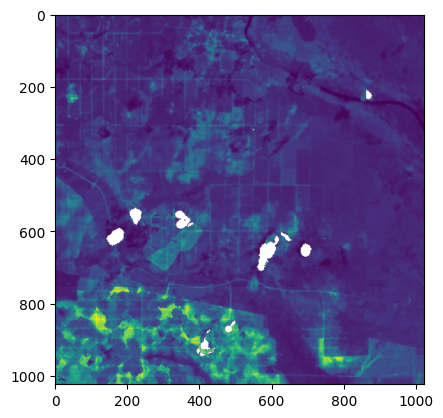

In [11]:
import rasterio
img_path = "data/train_images/train_0.tif"
channel = "SWIR2"
index = ['Aerosols', 'Blue', 'Green', 'Red', 'Red Edge 1', 'Red Edge 2', 'Red Edge 3', 'NIR', 'Red Edge 4', 'Water vapor', 'SWIR1', 'SWIR2'].index(channel) + 1  # rasterio band index starts from 1
with rasterio.open(img_path) as src:
    img = src.read(index)
    print(img.shape)
    plt.imshow(img)

In [12]:
# generator.get_img_mask_array()

In [13]:
# images["train_0.tif"]["profile"]

In [14]:
labels = generator.read_json("data")
"""
lagrer dataen som en dict data_images med en liste med alle bildene
hvert bilde indexeres med nummer og har keys: filename, annotations og startend date
"""
len(labels["data_images"]) # 176
labels["data_images"][0].keys() # dict_keys(['file_name', 'annotations', 'startend_date_composite'])
labels["data_images"][0]["startend_date_composite"] # '2019/01/01_2020/12/31'
labels["data_images"][0]["file_name"] # 'train_0.tif'

'train_0.tif'

In [15]:
dataset = new_generator.load_dataset(True)

Loaded 30 images.
Loaded 30 masked images.


In [16]:
print(dataset[0][0])

tensor([[[ 9.1282e-01,  5.0180e-01,  5.0180e-01,  ..., -1.8885e-01,
          -1.8885e-01, -1.8885e-01],
         [ 1.1318e+00,  9.9367e-01,  9.9367e-01,  ..., -1.8885e-01,
          -1.8885e-01, -1.8885e-01],
         [ 1.1318e+00,  9.9367e-01,  9.9367e-01,  ..., -1.8885e-01,
          -1.8885e-01, -1.8885e-01],
         ...,
         [ 1.3643e+00,  1.3643e+00,  1.3643e+00,  ...,  3.0976e-01,
           3.0976e-01,  3.0976e-01],
         [ 1.3643e+00,  1.3643e+00,  1.3643e+00,  ...,  3.0976e-01,
           3.0976e-01,  3.0976e-01],
         [ 1.3643e+00,  1.3643e+00,  1.3643e+00,  ...,  3.0976e-01,
           3.0976e-01,  3.0976e-01]],

        [[ 3.1147e-01,  2.6531e-01,  2.6531e-01,  ..., -9.1674e-02,
          -1.4738e-02, -2.7324e-01],
         [ 3.4225e-01,  2.5300e-01,  2.5300e-01,  ..., -9.1674e-02,
          -1.4738e-02, -2.7324e-01],
         [ 4.2534e-01,  4.1303e-01,  4.1303e-01,  ..., -1.6861e-01,
          -2.3016e-01, -3.0402e-01],
         ...,
         [ 1.3547e+00,  1

In [17]:
print(dataset[0][1])

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


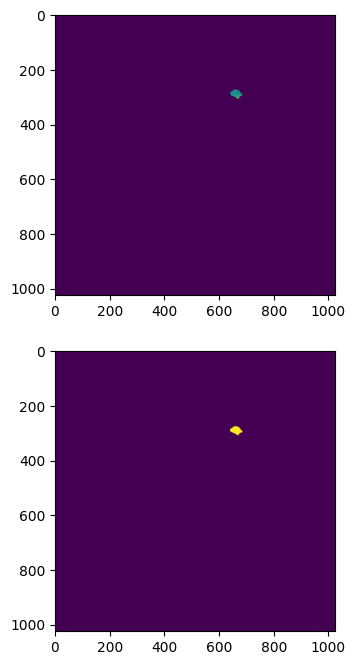

In [18]:
num = 1998
cropped_object, object_mask = new_generator.crop_target_object(num)
visualize(cropped_object[0], object_mask)

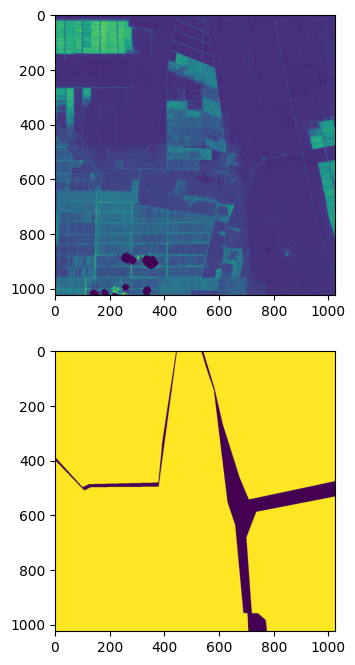

In [19]:
n = 10
visualize(dataset[n][0][3], dataset[n][1])

In [20]:
n = 10
new_generator.object_augm = 1
new_generator.extra_objects = 1

image, mask = new_generator.get_img_mask(dataset[n][0], dataset[n][1], None)

Cropped target object
(12, 1024, 1024)
(1024, 1024)


/Users/synneandreassen/Documents/MasterMaskinlæring/INF367A/Competition/INF367A-Solafune/utils/new_individual_object_functions.py:172: RuntimeWarning: invalid value encountered in cast
  image = image.transpose(1, 2, 0).astype(np.uint16)


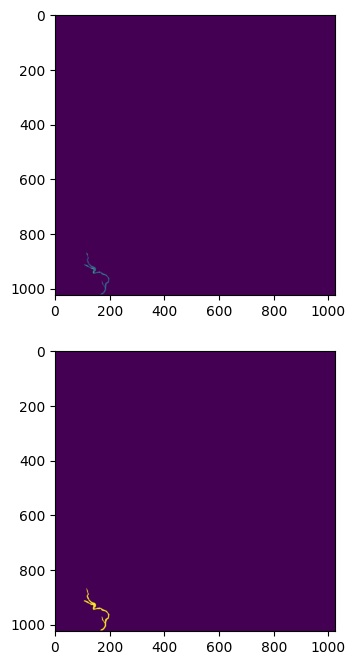

In [21]:
visualize(image[1], mask)